In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlrfit as mf
from matplotlib.colors import ListedColormap

/Users/parshakova.tanya/opt/anaconda3/envs/routing/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_matrix_spectral_clustering(A, ref_perm_A, filename=""):
    plt.rcParams['text.usetex'] = True
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), dpi=120)
    vmin = min(A.min(), ref_perm_A.min())
    vmax = max(A.max(), ref_perm_A.max())

    cax1 = ax1.matshow(A, cmap='hot', vmin=vmin, vmax=vmax)
    ax1.set_title(r"$A$", fontsize=30)

    cax2 = ax2.matshow(ref_perm_A, cmap='hot', vmin=vmin, vmax=vmax)
    ax2.set_title(r"$PAQ^T$", fontsize=30)
    # fig.colorbar(cax1, ax=[ax1, ax2])
    for ax in [ax1, ax2]:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    if filename:
        plt.savefig(filename, bbox_inches='tight')

In [3]:
m = 512
n = 512
A = mf.dgt_matrix(m, n, d=3, k=5)
# A = np.random.randint(-10, 5, m*n).reshape(m, n) * 1.0
symm = np.allclose(A, A.T)

# Balanced clustering

In [4]:
rows, sep_r, cols, sep_c = mf.spectral_partition(symm=symm, debug=True)(A)
print(f"{sep_r=}, {sep_c=}")
sum_diag = 0
perm_sum_diag = 0
ref_perm_sum_diag = 0
perm_A = A[rows, :][:, cols]
pi_rows2, pi_cols2, obj_all = mf.greedy_heur_refinement(A, rows, sep_r, cols, sep_c, \
                                                        symm=symm, max_iters=5000, debug=True)
assert np.allclose(obj_all[-1], mf.obj_partition_sum_full(A, pi_rows2, pi_cols2, sep_r, sep_c))
print(f"num_refined={len(obj_all)}, {symm=}, % inc. {100*(obj_all[-1]-obj_all[0])/np.abs(obj_all[0]):.2f}")
ref_perm_A = A[pi_rows2, :][:, pi_cols2]

for i in range(len(sep_r)-1):
    sum_diag += (A[sep_r[i]:sep_r[i+1], :][:, sep_c[i]:sep_c[i+1]]).sum()
    perm_sum_diag += (perm_A[sep_r[i]:sep_r[i+1], :][:, sep_c[i]:sep_c[i+1]]).sum()
    ref_perm_sum_diag += (ref_perm_A[sep_r[i]:sep_r[i+1], :][:, sep_c[i]:sep_c[i+1]]).sum()
# check if permutation increases the sum on the block diag
print(f"{ref_perm_sum_diag=}, {sum_diag=}")
assert ref_perm_sum_diag + 1e-9 >= perm_sum_diag
assert perm_sum_diag + 1e-9 >= sum_diag
assert A.min() == perm_A.min() and A.max() == perm_A.max() and np.allclose(A.mean(), perm_A.mean())
print("PASSED greedy heur. refinement implementation test")

sep_r=[0, 256, 512], sep_c=[0, 256, 512]


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


num_refined=46, symm=False, % inc. 9.50
ref_perm_sum_diag=7138.476221963155, sum_diag=4118.036562736823
PASSED greedy heur. refinement implementation test


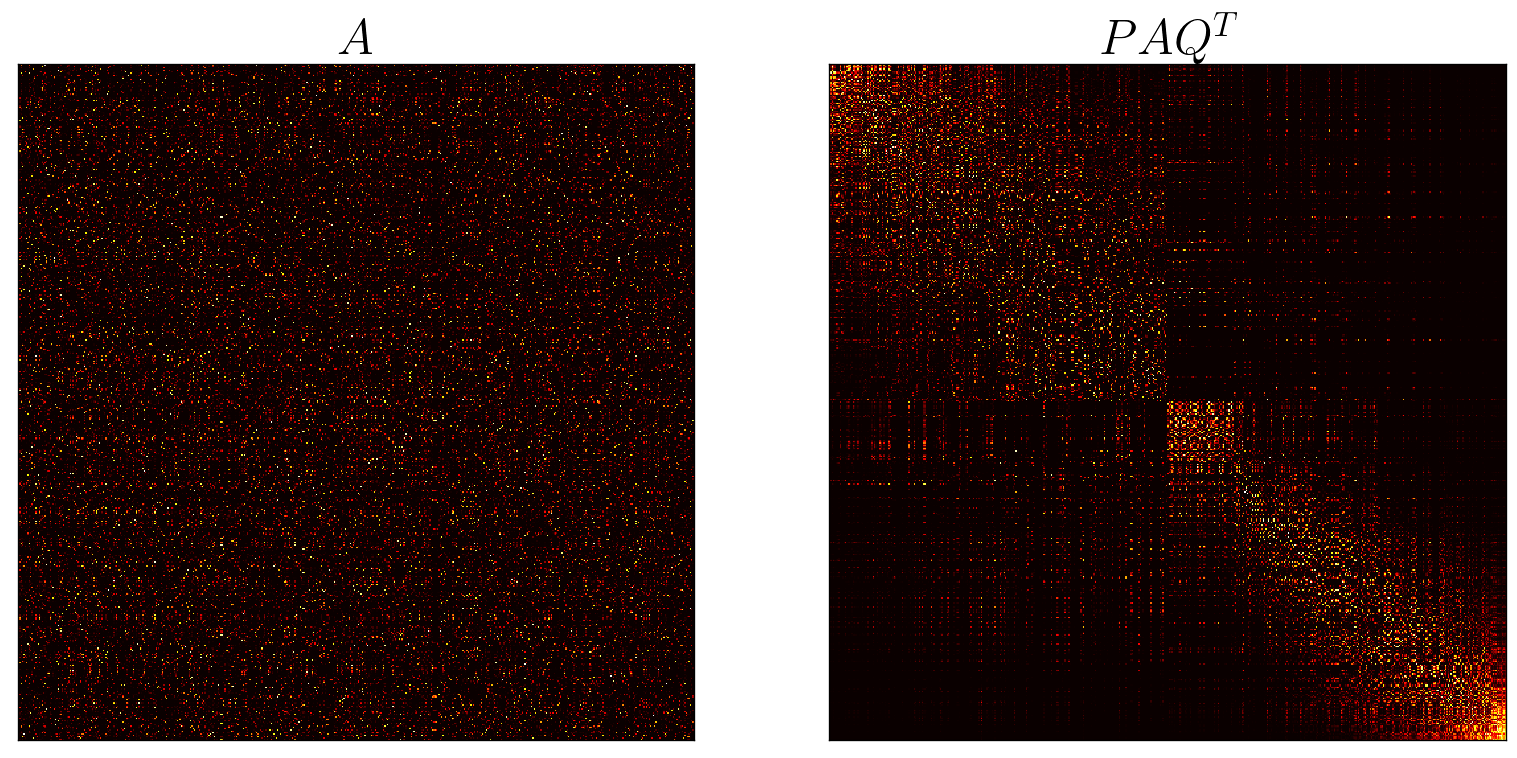

In [5]:
plot_matrix_spectral_clustering(A, ref_perm_A, filename="dgt_spectral_clustering.pdf")

# Unbalanced clustering

In [6]:
rows, sep_r, cols, sep_c = mf.spectral_partition(symm=symm, balanced=False, debug=True)(A)
print(f"{sep_r=}, {sep_c=}")
sum_diag = 0
perm_sum_diag = 0
ref_perm_sum_diag = 0
perm_A = A[rows, :][:, cols]
pi_rows2, pi_cols2, obj_all = mf.greedy_heur_refinement(A, rows, sep_r, cols, sep_c, \
                                                        symm=symm, max_iters=5000, debug=True)
assert np.allclose(obj_all[-1], mf.obj_partition_sum_full(A, pi_rows2, pi_cols2, sep_r, sep_c))
print(f"num_refined={len(obj_all)}, {symm=}, % inc. {100*(obj_all[-1]-obj_all[0])/np.abs(obj_all[0]):.2f}")
ref_perm_A = A[pi_rows2, :][:, pi_cols2]

for i in range(len(sep_r)-1):
    sum_diag += (A[sep_r[i]:sep_r[i+1], :][:, sep_c[i]:sep_c[i+1]]).sum()
    perm_sum_diag += (perm_A[sep_r[i]:sep_r[i+1], :][:, sep_c[i]:sep_c[i+1]]).sum()
    ref_perm_sum_diag += (ref_perm_A[sep_r[i]:sep_r[i+1], :][:, sep_c[i]:sep_c[i+1]]).sum()
# check if permutation increases the sum on the block diag
print(f"{ref_perm_sum_diag=}, {sum_diag=}")
assert ref_perm_sum_diag + 1e-9 >= perm_sum_diag
assert perm_sum_diag + 1e-9 >= sum_diag
assert A.min() == perm_A.min() and A.max() == perm_A.max() and np.allclose(A.mean(), perm_A.mean())
print("PASSED greedy heur. refinement implementation test")

sep_r=[0, 349, 512], sep_c=[0, 341, 512]
num_refined=15, symm=False, % inc. 1.61
ref_perm_sum_diag=7281.655862479758, sum_diag=4626.563427026102
PASSED greedy heur. refinement implementation test


In [7]:
print(f"{sep_r=}, {sep_c=}")

sep_r=[0, 349, 512], sep_c=[0, 341, 512]


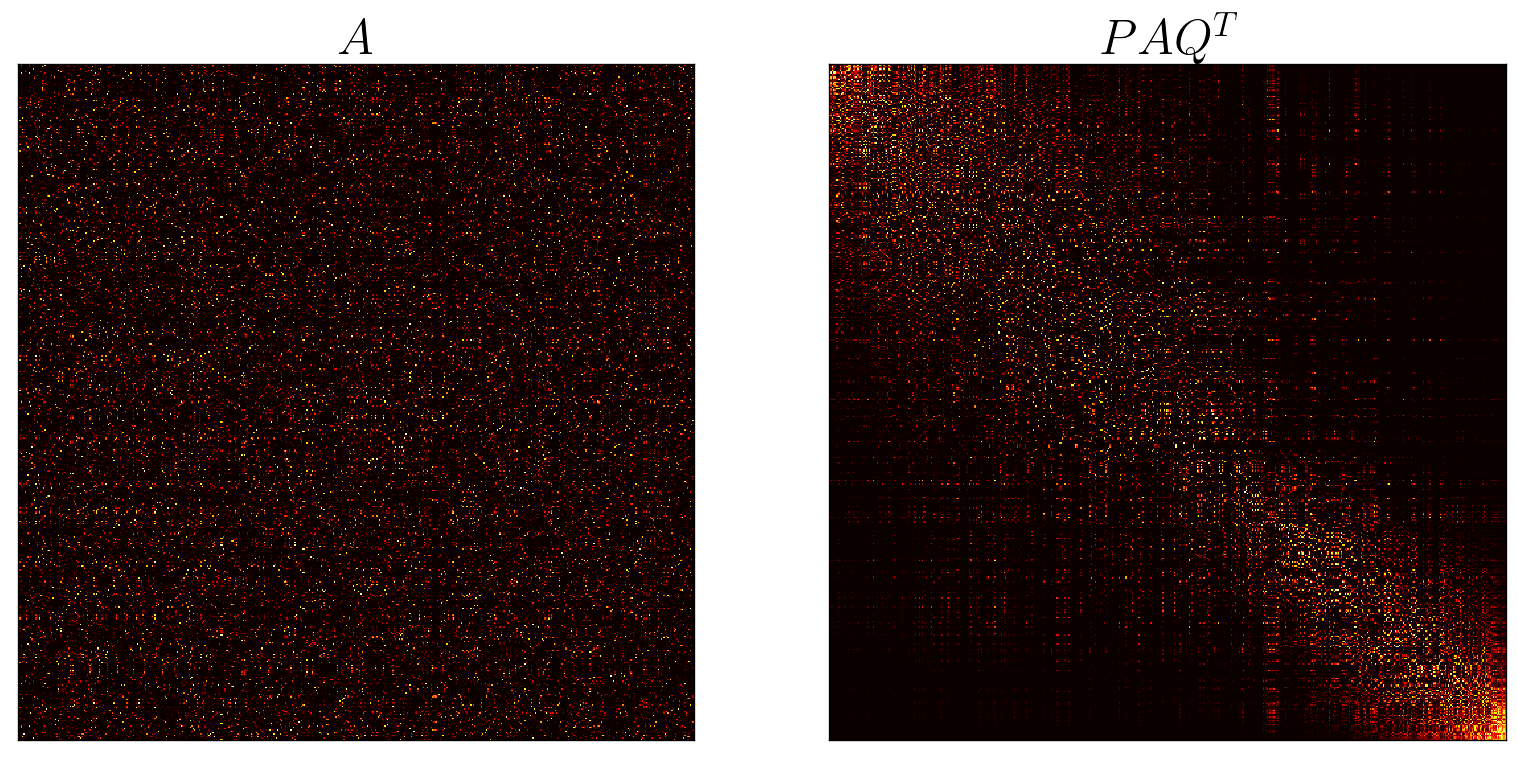

In [8]:
plot_matrix_spectral_clustering(A, ref_perm_A, filename="dgt_spectral_clustering_unbalanced.pdf")

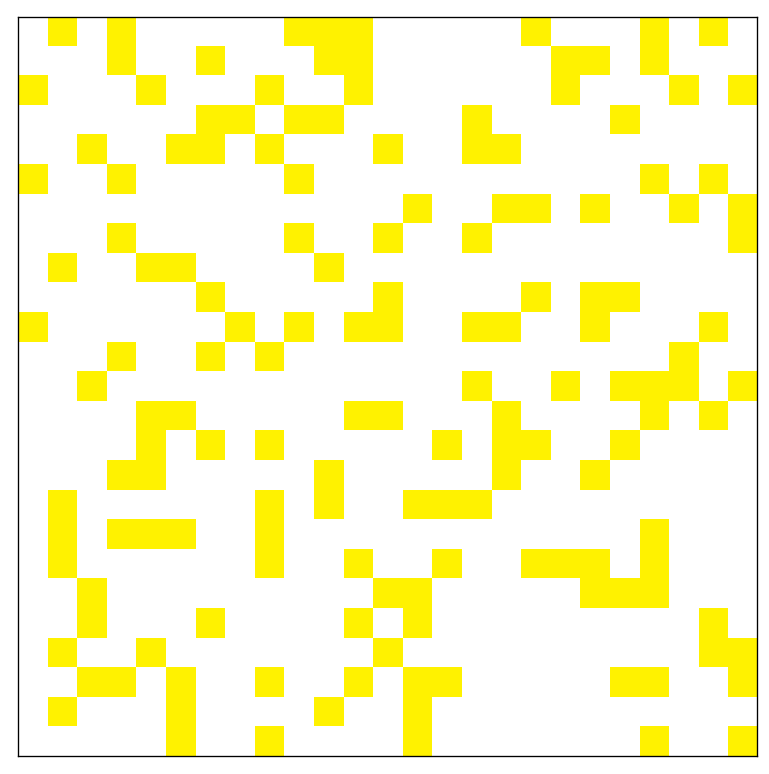

In [9]:
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(1, figsize=(8, 8), dpi=120)
A = (np.random.rand(625).reshape((25, 25)) < 0.75).astype(int)

cax = ax.matshow(A, cmap=ListedColormap(['#FFF200', 'w']))

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("sparse_matrix.pdf", bbox_inches='tight')

plt.show()

In [10]:
from scipy.linalg import block_diag

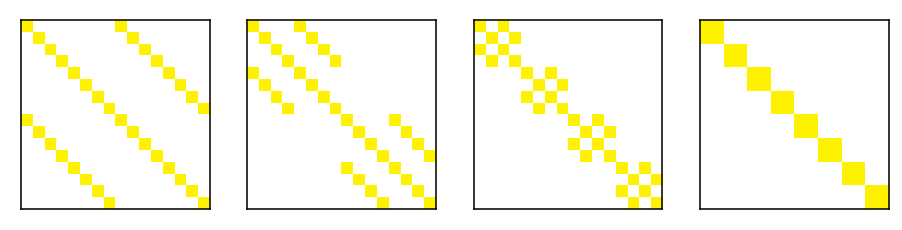

In [11]:
As = [np.eye(16) + np.eye(16, k=8, dtype=int) + np.eye(16, k=-8, dtype=int)]
As += [block_diag(*[np.eye(8) + np.eye(8, k=4, dtype=int) + np.eye(8, k=-4, dtype=int)]*2)]
As += [block_diag(*[np.eye(4) + np.eye(4, k=2, dtype=int) + np.eye(4, k=-2, dtype=int)]*4)]
As += [block_diag(*[np.ones((2, 2))]*8)]
plt.rcParams['text.usetex'] = True
fig, axs = plt.subplots(1, len(As), figsize=(8, 8), dpi=140)
for i, ax in enumerate(axs):
    cax = ax.matshow(As[i], cmap=ListedColormap(['w', '#FFF200']))
for ax in axs:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig("butterfly_matrix.pdf", bbox_inches='tight')

plt.show()